11501568/11490434 [==============================] - 0s 0us/step


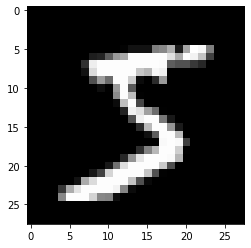

In [ ]:
#Resolución del problema con Tensorflow
import tensorflow as tf # Import tensorflow library
import matplotlib.pyplot as plt # Import matplotlib library
import numpy as np # Import numpy library

mnist = tf.keras.datasets.mnist # Object of the MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data

plt.imshow(x_train[0], cmap="gray") # Import the image
plt.show() # Plot the image

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1) # Normalize the training dataset
x_test = tf.keras.utils.normalize(x_test, axis=1) # Normalize the testing dataset

#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(x=x_train, y=y_train, epochs=5) # Start training process

Epoch 1/5
1875/1875 [==============================] - 12s 4ms/step - loss: 0.2582 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1048 - accuracy: 0.9676
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0734 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0551 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0412 - accuracy: 0.9866


In [ ]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9725

Test accuracy: 0.9725000262260437


In [ ]:
# Verificamos sus predicciones para los datos restantes
esperado = y_test
prediccion = np.argmax(model.predict(x_test), axis=-1)

# Y mostramos los resultados.
from sklearn import metrics

matriz_conf=metrics.confusion_matrix(esperado, prediccion)
clasif_report=metrics.classification_report(esperado, prediccion)

print("Reporte del clasificador: \n %s\n %s\n" %(model, clasif_report))
print("Matriz de confusión:\n%s" % matriz_conf)
#Macro AVG: Promedio normal de métricas F1 para cada clase
#Weighted AVG: Promedio ponderado de F1 por porcentaje de elementos de la clase
#https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

Reporte del clasificador: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.95      0.97       982
           5       0.99      0.95      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.94      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Matriz de confusión:
[[ 972    0    2    1    0    0    1    0    3    1]
 [   0 1117    6    2    0    0    3    0    6    1]
 [   2    0 1015    4    1    0    1    6    3    0]
 [   0    0    9  990    0    1 

Número real: 0


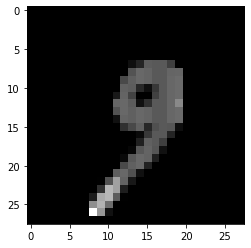

In [ ]:
print('Número real: '+str(np.argmax(prediccion[1000]))) # Print out the number
plt.imshow(x_test[1000], cmap="gray") # Import the image
plt.show() # Show the image

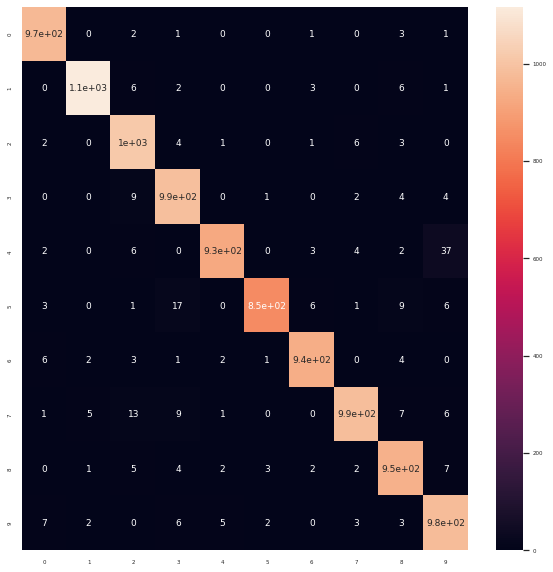

In [ ]:
###Visualización mejor de la matriz de confusión###
import seaborn as sn
#snn_cm = confusion_matrix(np.argmax(y_test_onehot, axis=1), np.argmax(y_test_predichos, axis=1))
#snn_df_cm = pd.DataFrame(snn_cm, range(100), range(100))  
#snn_df_cm = pd.DataFrame(snn_cm)
plt.figure(figsize = (10,10))  
sn.set(font_scale=0.5) #for label size  
sn.heatmap(matriz_conf, annot=True, annot_kws={"size": 9}) # font size  
plt.show()

###Ejercicio 1: Analizar el reporte del clasificador, los indicadores de rendimiento y la matriz de confusión



¿Qué les dicen los valores?

###Ejercicio 2: Localizar dos elementos para los cuales el modelo haya fallado, y verificar por qué puede haberse equivocado.



###Ejercicio 3: Probar otras arquitecturas de RN, usando diferentes funciones de activación, learning rates y otros parámetros


Presentar un gráfico con los diferentes resultados de desempeño y sus configuraciones